In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
df=pd.read_csv("./dataset/Clean_dataset.csv")

In [3]:
df

,Unnamed: 0,airline,flight,source_city,departure_time,stops,arrival_time,destination_city,class,duration,days_left,price
0,0,SpiceJet,SG-8709,Delhi,Evening,zero,Night,Mumbai,Economy,2.17,1,5953
1,1,SpiceJet,SG-8157,Delhi,Early_Morning,zero,Morning,Mumbai,Economy,2.33,1,5953
2,2,AirAsia,I5-764,Delhi,Early_Morning,zero,Early_Morning,Mumbai,Economy,2.17,1,5956
3,3,Vistara,UK-995,Delhi,Morning,zero,Afternoon,Mumbai,Economy,2.25,1,5955
4,4,Vistara,UK-963,Delhi,Morning,zero,Morning,Mumbai,Economy,2.33,1,5955
...,...,...,...,...,...,...,...,...,...,...,...,...
300148,300148,Vistara,UK-822,Chennai,Morning,one,Evening,Hyderabad,Business,10.08,49,69265
300149,300149,Vistara,UK-826,Chennai,Afternoon,one,Night,Hyderabad,Business,10.42,49,77105
300150,300150,Vistara,UK-832,Chennai,Early_Morning,one,Night,Hyderabad,Business,13.83,49,79099
300151,300151,Vistara,UK-828,Chennai,Early_Morning,one,Evening,Hyderabad,Business,10.00,49,81585


In [4]:
df.describe(include="all")

,Unnamed: 0,airline,flight,source_city,departure_time,stops,arrival_time,destination_city,class,duration,days_left,price
count,300153.000000,300153,300153,300153,300153,300153,300153,300153,300153,300153.000000,300153.000000,300153.000000
unique,NaN,6,1561,6,6,3,6,6,2,NaN,NaN,NaN
top,NaN,Vistara,UK-706,Delhi,Morning,one,Night,Mumbai,Economy,NaN,NaN,NaN
freq,NaN,127859,3235,61343,71146,250863,91538,59097,206666,NaN,NaN,NaN
mean,150076.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,12.221021,26.004751,20889.660523
std,86646.852011,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,7.191997,13.561004,22697.767366
min,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.830000,1.000000,1105.000000
25%,75038.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6.830000,15.000000,4783.000000
50%,150076.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,11.250000,26.000000,7425.000000
75%,225114.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,16.170000,38.000000,42521.000000


In [5]:
# check for the null values
df.isnull().sum()

Unnamed: 0          0
airline             0
flight              0
source_city         0
departure_time      0
stops               0
arrival_time        0
destination_city    0
class               0
duration            0
days_left           0
price               0
dtype: int64

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 300153 entries, 0 to 300152
Data columns (total 12 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   Unnamed: 0        300153 non-null  int64  
 1   airline           300153 non-null  object 
 2   flight            300153 non-null  object 
 3   source_city       300153 non-null  object 
 4   departure_time    300153 non-null  object 
 5   stops             300153 non-null  object 
 6   arrival_time      300153 non-null  object 
 7   destination_city  300153 non-null  object 
 8   class             300153 non-null  object 
 9   duration          300153 non-null  float64
 10  days_left         300153 non-null  int64  
 11  price             300153 non-null  int64  
dtypes: float64(1), int64(3), object(8)
memory usage: 27.5+ MB


In [7]:
# There are no null values
# Drop the unwanted columns
df.drop(columns='Unnamed: 0', inplace=True)

In [8]:
df

,airline,flight,source_city,departure_time,stops,arrival_time,destination_city,class,duration,days_left,price
0,SpiceJet,SG-8709,Delhi,Evening,zero,Night,Mumbai,Economy,2.17,1,5953
1,SpiceJet,SG-8157,Delhi,Early_Morning,zero,Morning,Mumbai,Economy,2.33,1,5953
2,AirAsia,I5-764,Delhi,Early_Morning,zero,Early_Morning,Mumbai,Economy,2.17,1,5956
3,Vistara,UK-995,Delhi,Morning,zero,Afternoon,Mumbai,Economy,2.25,1,5955
4,Vistara,UK-963,Delhi,Morning,zero,Morning,Mumbai,Economy,2.33,1,5955
...,...,...,...,...,...,...,...,...,...,...,...
300148,Vistara,UK-822,Chennai,Morning,one,Evening,Hyderabad,Business,10.08,49,69265
300149,Vistara,UK-826,Chennai,Afternoon,one,Night,Hyderabad,Business,10.42,49,77105
300150,Vistara,UK-832,Chennai,Early_Morning,one,Night,Hyderabad,Business,13.83,49,79099
300151,Vistara,UK-828,Chennai,Early_Morning,one,Evening,Hyderabad,Business,10.00,49,81585


In [9]:
# As class is pre-defined word in python change the column name
df.rename(columns={'class': 'flight_class'}, inplace = True)

In [10]:
df


,airline,flight,source_city,departure_time,stops,arrival_time,destination_city,flight_class,duration,days_left,price
0,SpiceJet,SG-8709,Delhi,Evening,zero,Night,Mumbai,Economy,2.17,1,5953
1,SpiceJet,SG-8157,Delhi,Early_Morning,zero,Morning,Mumbai,Economy,2.33,1,5953
2,AirAsia,I5-764,Delhi,Early_Morning,zero,Early_Morning,Mumbai,Economy,2.17,1,5956
3,Vistara,UK-995,Delhi,Morning,zero,Afternoon,Mumbai,Economy,2.25,1,5955
4,Vistara,UK-963,Delhi,Morning,zero,Morning,Mumbai,Economy,2.33,1,5955
...,...,...,...,...,...,...,...,...,...,...,...
300148,Vistara,UK-822,Chennai,Morning,one,Evening,Hyderabad,Business,10.08,49,69265
300149,Vistara,UK-826,Chennai,Afternoon,one,Night,Hyderabad,Business,10.42,49,77105
300150,Vistara,UK-832,Chennai,Early_Morning,one,Night,Hyderabad,Business,13.83,49,79099
300151,Vistara,UK-828,Chennai,Early_Morning,one,Evening,Hyderabad,Business,10.00,49,81585


In [11]:
df.source_city.unique()

array(['Delhi', 'Mumbai', 'Bangalore', 'Kolkata', 'Hyderabad', 'Chennai'],
      dtype=object)

In [12]:
# df visualization

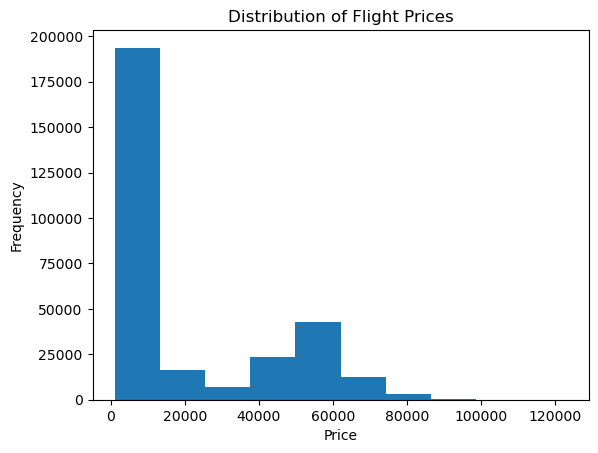

In [13]:
plt.hist(df['price'])
plt.title('Distribution of Flight Prices')
plt.xlabel('Price')
plt.ylabel('Frequency')
plt.show()

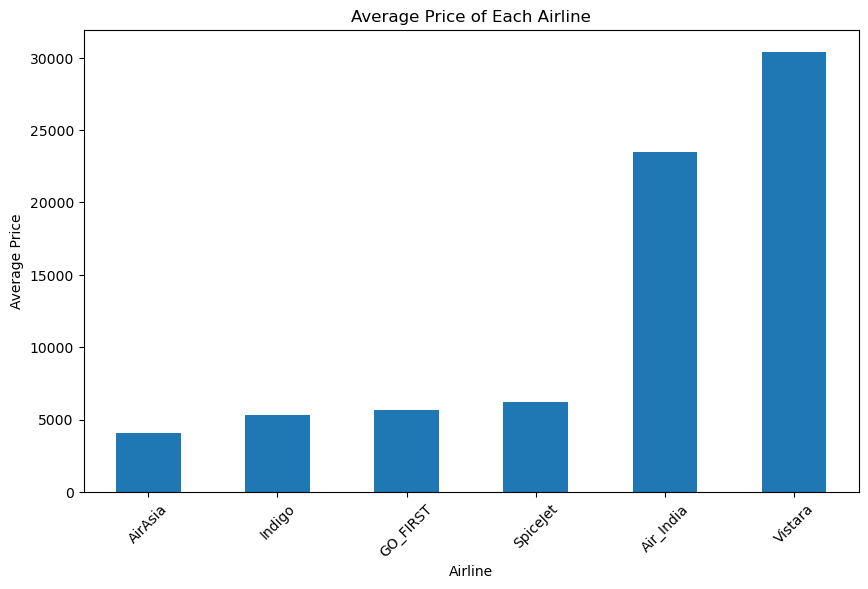

In [14]:
# Calculate the average price for each airline
average_price_per_airline = df.groupby('airline')['price'].mean().sort_values()

# Create a bar plot
plt.figure(figsize=(10, 6))
average_price_per_airline.plot(kind='bar')
plt.title('Average Price of Each Airline')
plt.xlabel('Airline')
plt.ylabel('Average Price')
plt.xticks(rotation=45)
plt.show()

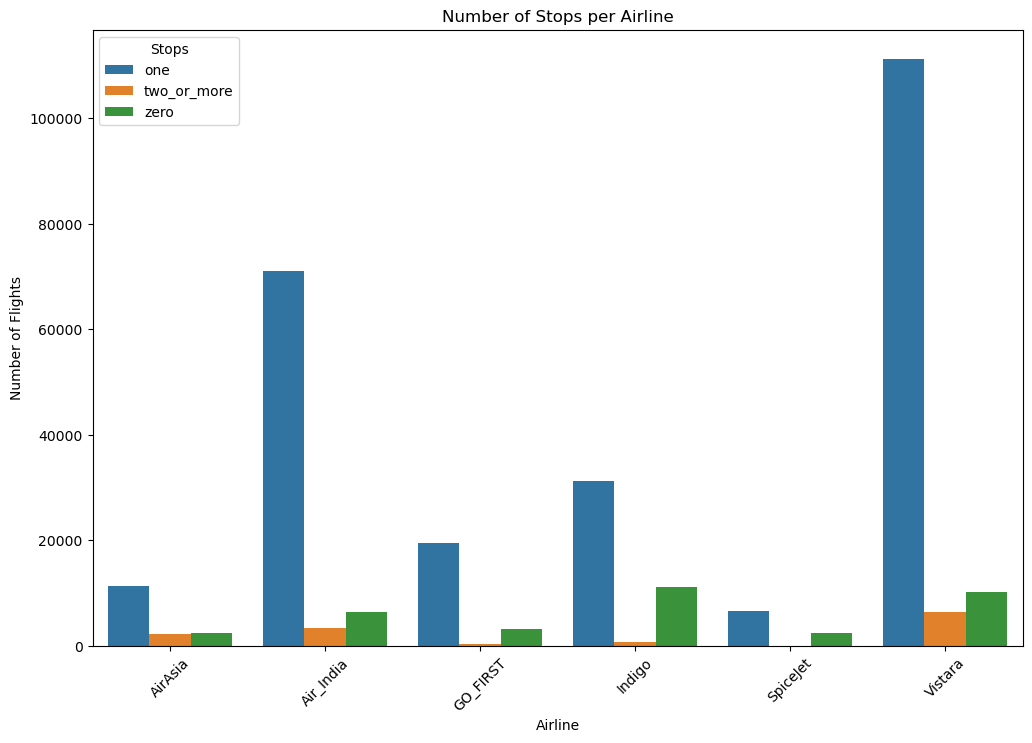

In [15]:
# Calculate the count of stops for each airline
stops_count_per_airline = df.groupby(['airline', 'stops']).size().reset_index(name='count')

# Create a bar plot
plt.figure(figsize=(12, 8))
sns.barplot(x='airline', y='count', hue='stops', data=stops_count_per_airline)
plt.title('Number of Stops per Airline')
plt.xlabel('Airline')
plt.ylabel('Number of Flights')
plt.xticks(rotation=45)
plt.legend(title='Stops')
plt.show()

In [16]:
# How is the price affected when tickets are bought in just 1 or 2 days before departure?

<Figure size 1200x800 with 0 Axes>

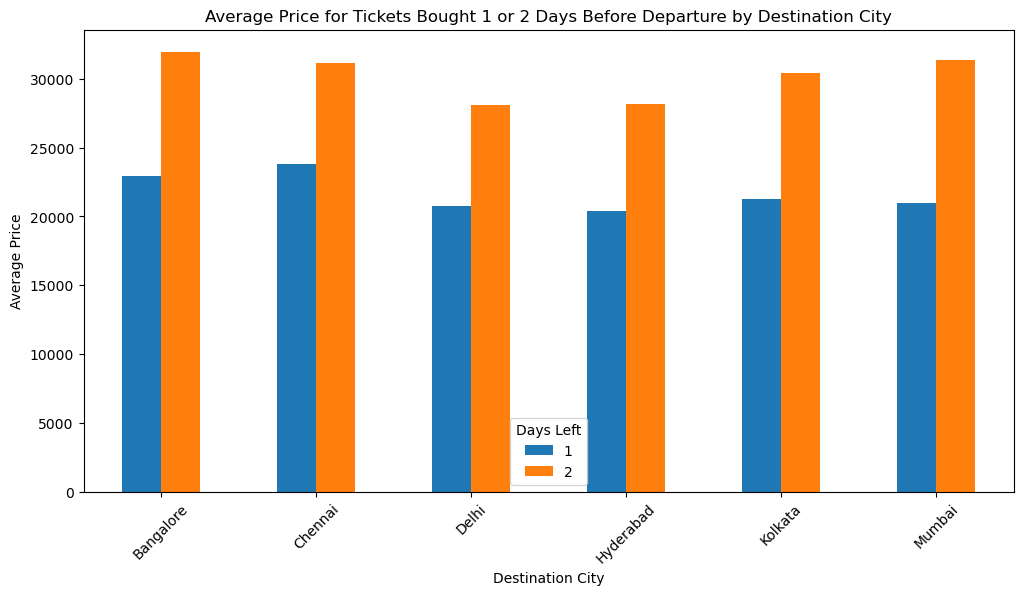

In [17]:
# Filter the dfset for tickets bought 1 or 2 days before departure
short_notice_df = df[df['days_left'].isin([1, 2])]

# Calculate the average price for each destination city when tickets are bought 1 or 2 days before departure
average_prices = short_notice_df.groupby(['destination_city', 'days_left'])['price'].mean().unstack()

# Plot the results
plt.figure(figsize=(12, 8))
average_prices.plot(kind='bar', figsize=(12, 6))
plt.title('Average Price for Tickets Bought 1 or 2 Days Before Departure by Destination City')
plt.xlabel('Destination City')
plt.ylabel('Average Price')
plt.xticks(rotation=45)
plt.legend(title='Days Left')
plt.show()

In [18]:
# How does the ticket price vary between Economy and Business class?

<Figure size 1200x800 with 0 Axes>

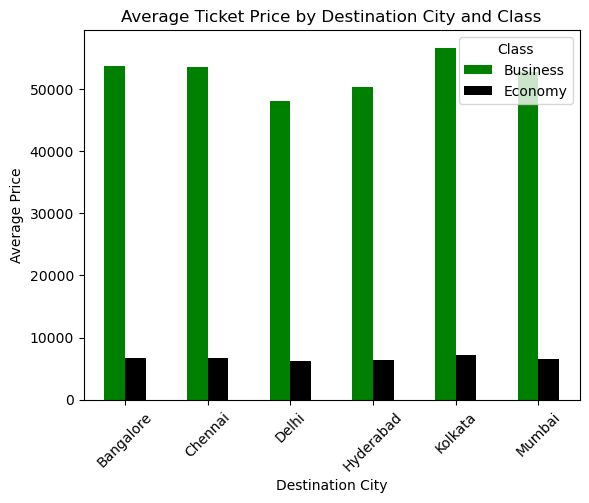

In [19]:
# Calculate the average price for each destination city and class
average_prices_by_city_class = df.groupby(['destination_city', 'flight_class'])['price'].mean().unstack()

# Plot the results with specified colors
plt.figure(figsize=(12, 8))
average_prices_by_city_class.plot(kind='bar', color=['green', 'black'])  # Example colors: blue for Economy, orange for Business
plt.title('Average Ticket Price by Destination City and Class')
plt.xlabel('Destination City')
plt.ylabel('Average Price')
plt.xticks(rotation=45)
plt.legend(title='Class')
plt.show()

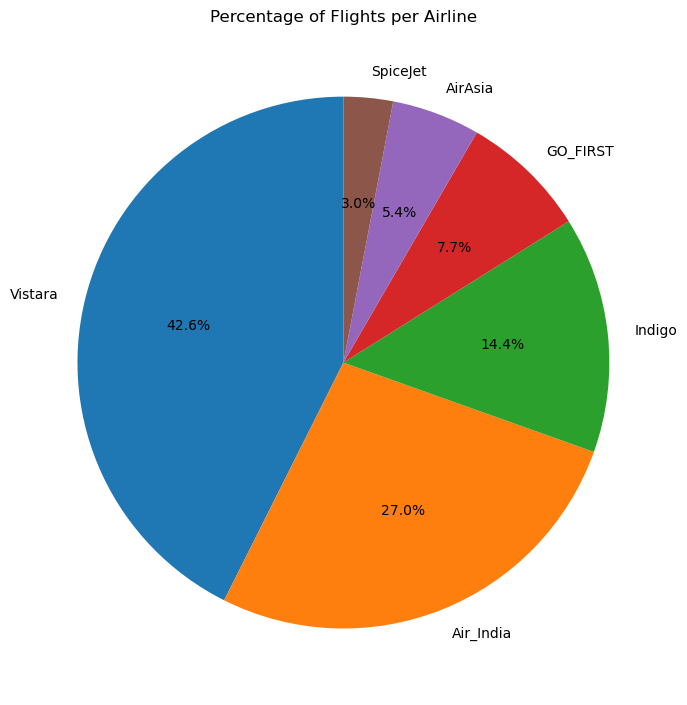

In [20]:
# Calculate the percentage of flights for each airline
airline_percentage = df['airline'].value_counts(normalize=True) * 100

# Calculate the percentage of flights for each source city
source_city_percentage = df['source_city'].value_counts(normalize=True) * 100

# Plotting the pie chart for airlines
plt.figure(figsize=(14, 7))

plt.subplot(1, 2, 1)  # 1 row, 2 columns, 1st subplot
airline_percentage.plot(kind='pie', autopct='%1.1f%%', startangle=90)
plt.title('Percentage of Flights per Airline')
plt.ylabel('')  # Hide the y-label as it's not needed for pie charts
plt.tight_layout()
plt.show() 


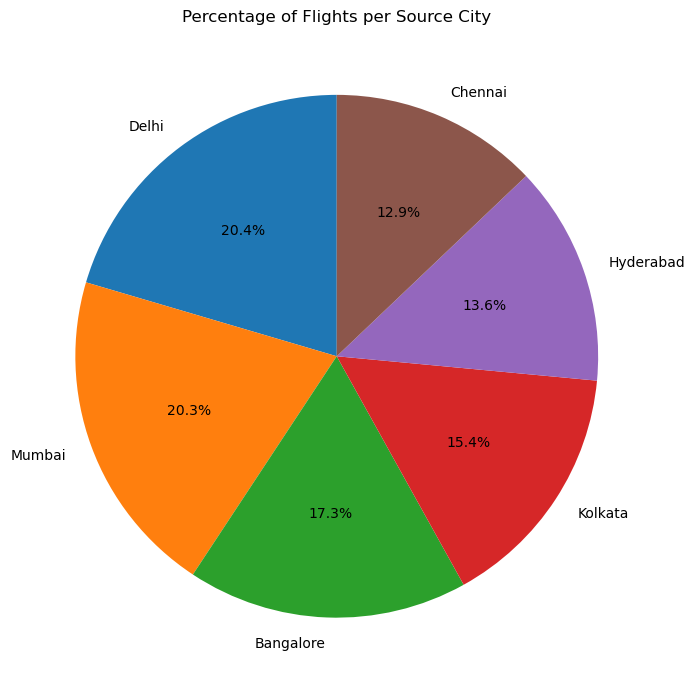

In [21]:
# Plotting the pie chart for source cities
plt.figure(figsize=(14, 7))
plt.subplot(1, 2, 2)  # 1 row, 2 columns, 2nd subplot
source_city_percentage.plot(kind='pie', autopct='%1.1f%%', startangle=90)
plt.title('Percentage of Flights per Source City')
plt.ylabel('')

plt.tight_layout()
plt.show()

In [22]:
# label encoding
from sklearn.preprocessing import LabelEncoder

In [23]:
# Initialize LabelEncoder
le = LabelEncoder()

# Apply Label Encoding for categorical features
for column in df.columns:
    if df[column].dtype == 'object':
        df[column] = le.fit_transform(df[column])

In [24]:
df

,airline,flight,source_city,departure_time,stops,arrival_time,destination_city,flight_class,duration,days_left,price
0,4,1408,2,2,2,5,5,1,2.17,1,5953
1,4,1387,2,1,2,4,5,1,2.33,1,5953
2,0,1213,2,1,2,1,5,1,2.17,1,5956
3,5,1559,2,4,2,0,5,1,2.25,1,5955
4,5,1549,2,4,2,4,5,1,2.33,1,5955
...,...,...,...,...,...,...,...,...,...,...,...
300148,5,1477,1,4,0,2,3,0,10.08,49,69265
300149,5,1481,1,0,0,5,3,0,10.42,49,77105
300150,5,1486,1,1,0,5,3,0,13.83,49,79099
300151,5,1483,1,1,0,2,3,0,10.00,49,81585


In [25]:
# correlation matrix

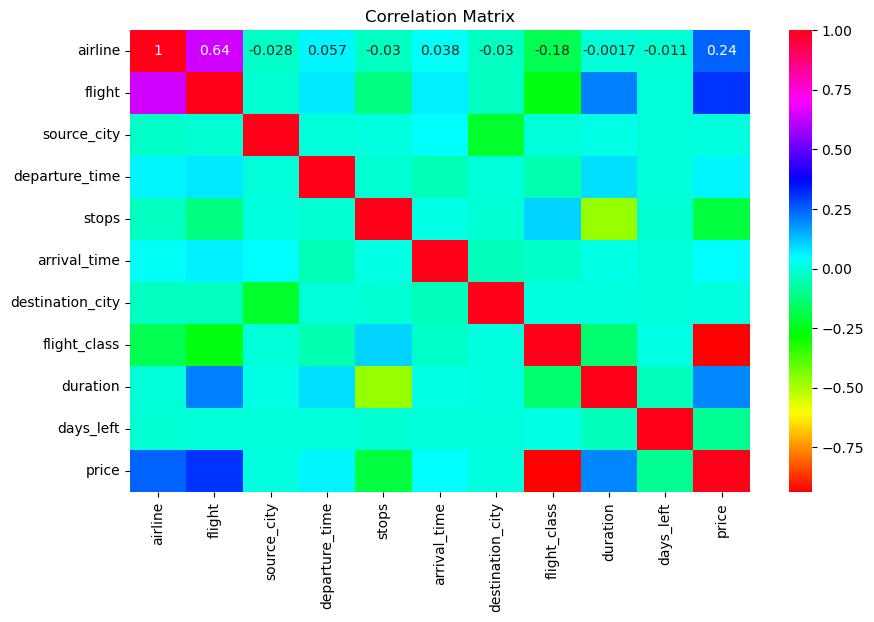

In [26]:
# Calculate the correlation matrix
correlation_matrix = df.corr()

# Plot the correlation matrix using a heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='hsv')
plt.title('Correlation Matrix')
plt.show()

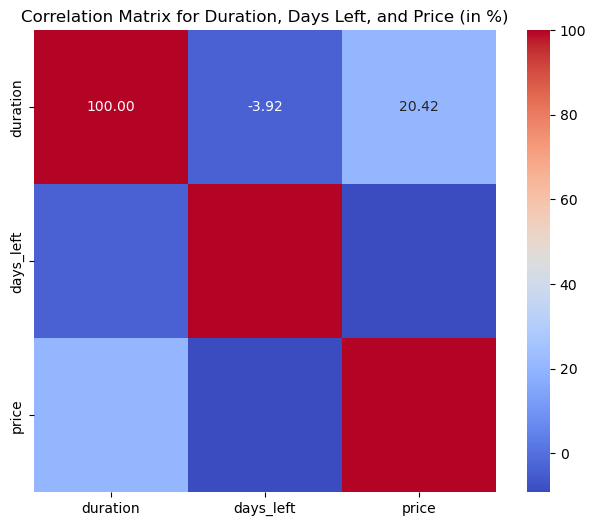

In [27]:
# Select the specific columns for the correlation analysis
selected_columns = df[['duration', 'days_left', 'price']]

# Calculate the correlation matrix for the selected columns
correlation_matrix = selected_columns.corr()

# Convert the correlation values to percentages
correlation_matrix_percentage = correlation_matrix * 100

# Plot the correlation matrix using a heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix_percentage, annot=True, fmt=".2f", cmap='coolwarm', square=True)
plt.title('Correlation Matrix for Duration, Days Left, and Price (in %)')
plt.show()

In [28]:
df.columns

Index(['airline', 'flight', 'source_city', 'departure_time', 'stops',
       'arrival_time', 'destination_city', 'flight_class', 'duration',
       'days_left', 'price'],
      dtype='object')

In [29]:
df.head()

,airline,flight,source_city,departure_time,stops,arrival_time,destination_city,flight_class,duration,days_left,price
0,4,1408,2,2,2,5,5,1,2.17,1,5953
1,4,1387,2,1,2,4,5,1,2.33,1,5953
2,0,1213,2,1,2,1,5,1,2.17,1,5956
3,5,1559,2,4,2,0,5,1,2.25,1,5955
4,5,1549,2,4,2,4,5,1,2.33,1,5955


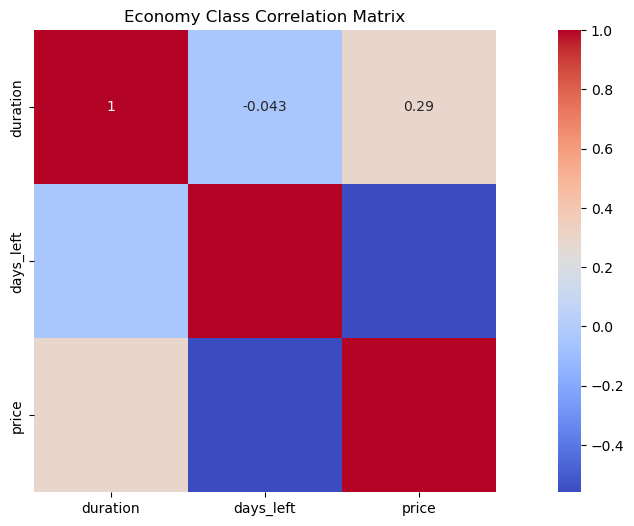

/opt/anaconda3/lib/python3.11/site-packages/seaborn/matrix.py:202: RuntimeWarning: All-NaN slice encountered
  vmin = np.nanmin(calc_data)
/opt/anaconda3/lib/python3.11/site-packages/seaborn/matrix.py:207: RuntimeWarning: All-NaN slice encountered
  vmax = np.nanmax(calc_data)
/opt/anaconda3/lib/python3.11/site-packages/seaborn/matrix.py:260: FutureWarning: Format strings passed to MaskedConstant are ignored, but in future may error or produce different behavior
  annotation = ("{:" + self.fmt + "}").format(val)


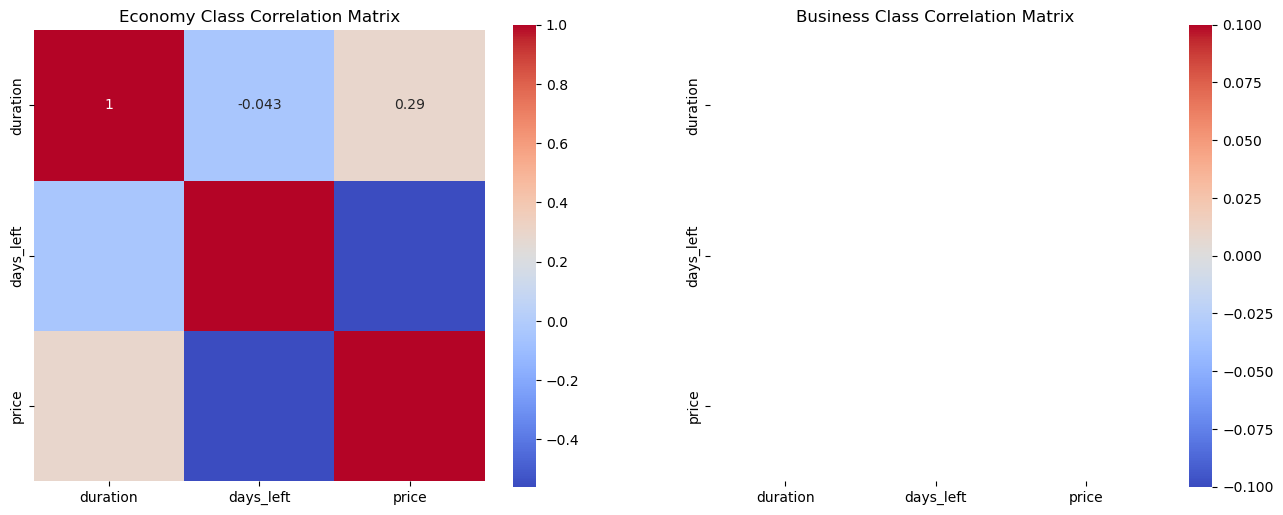

In [30]:
# Filter the df for Economy and Business classes
economy_df = df[df['flight_class'] == 1][['duration', 'days_left', 'price']]

# Calculate the correlation matrices
economy_corr = economy_df.corr()

# Plotting the correlation matrices
plt.figure(figsize=(16, 6))

# Economy class correlation matrix
sns.heatmap(economy_corr, annot=True, cmap='coolwarm', square=True)
plt.title('Economy Class Correlation Matrix')


plt.show()

# Filter the data for Economy and Business classes
economy_df = df[df['flight_class'] == 1][['duration', 'days_left', 'price']]
business_df = df[df['flight_class'] == 2][['duration', 'days_left', 'price']]

# Calculate the correlation matrices
economy_corr = economy_df.corr()
business_corr = business_df.corr()

# Plotting the correlation matrices
plt.figure(figsize=(16, 6))

# Economy class correlation matrix
plt.subplot(1, 2, 1)
sns.heatmap(economy_corr, annot=True, cmap='coolwarm', square=True)
plt.title('Economy Class Correlation Matrix')

# Business class correlation matrix
plt.subplot(1, 2, 2)
sns.heatmap(business_corr, annot=True, cmap='coolwarm', square=True)
plt.title('Business Class Correlation Matrix')

plt.show()

In [31]:
economy_corr

,duration,days_left,price
duration,1.000000,-0.042537,0.288379
days_left,-0.042537,1.000000,-0.559551
price,0.288379,-0.559551,1.000000


In [32]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error

# Load your dataset
# data = pd.read_csv('your_dataset.csv')

# For the sake of the example, let's assume the data is already loaded and contains the 'price' column
# and the features are ['duration', 'days_left']

# Define features and target variable
X = df.drop(columns=['price'])
y = df['price']

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize the models
linear_model = LinearRegression()
knn_model = KNeighborsRegressor(n_neighbors=5)
decision_tree_model = DecisionTreeRegressor(random_state=42)
random_forest_model = RandomForestRegressor(n_estimators=100, random_state=42)

# Fit the models on the training data
linear_model.fit(X_train, y_train)
knn_model.fit(X_train, y_train)
decision_tree_model.fit(X_train, y_train)
random_forest_model.fit(X_train, y_train)

# Make predictions on the test set
linear_predictions = linear_model.predict(X_test)
knn_predictions = knn_model.predict(X_test)
decision_tree_predictions = decision_tree_model.predict(X_test)
random_forest_predictions = random_forest_model.predict(X_test)

# Calculate and print the Mean Squared Error (MSE) for each model
linear_mse = mean_squared_error(y_test, linear_predictions)
knn_mse = mean_squared_error(y_test, knn_predictions)
decision_tree_mse = mean_squared_error(y_test, decision_tree_predictions)
random_forest_mse = mean_squared_error(y_test, random_forest_predictions)

print(f"Linear Regression MSE: {linear_mse}")
print(f"KNN MSE: {knn_mse}")
print(f"Decision Tree MSE: {decision_tree_mse}")
print(f"Random Forest MSE: {random_forest_mse}")


Linear Regression MSE: 49190002.62043748
KNN MSE: 282926305.8000067
Decision Tree MSE: 8837163.316155633
Random Forest MSE: 5378019.840799138


In [33]:
from sklearn.metrics import r2_score

# Assuming y_test and model predictions (linear_predictions, knn_predictions, etc.) are defined

linear_r2 = r2_score(y_test, linear_predictions)
knn_r2 = r2_score(y_test, knn_predictions)
decision_tree_r2 = r2_score(y_test, decision_tree_predictions)
random_forest_r2 = r2_score(y_test, random_forest_predictions)

print(f"Linear Regression R-squared: {linear_r2:.2f}")
print(f"KNN R-squared: {knn_r2:.2f}")
print(f"Decision Tree R-squared: {decision_tree_r2:.2f}")
print(f"Random Forest R-squared: {random_forest_r2:.2f}")

Linear Regression R-squared: 0.90
KNN R-squared: 0.45
Decision Tree R-squared: 0.98
Random Forest R-squared: 0.99


In [34]:
X_test.head()

,airline,flight,source_city,departure_time,stops,arrival_time,destination_city,flight_class,duration,days_left
27131,1,748,2,4,0,1,4,1,19.75,40
266857,5,1442,4,4,0,5,5,0,9.83,42
141228,5,1454,4,4,0,5,0,1,10.50,41
288329,5,1479,1,5,0,4,2,0,14.50,14
97334,1,743,0,0,0,5,5,1,8.25,20


In [35]:
y_test.head()

27131      7366
266857    64831
141228     6195
288329    60160
97334      6578
Name: price, dtype: int64

In [36]:
df.columns

Index(['airline', 'flight', 'source_city', 'departure_time', 'stops',
       'arrival_time', 'destination_city', 'flight_class', 'duration',
       'days_left', 'price'],
      dtype='object')

In [37]:
# Given random values for each feature
rv = [1, 748, 2, 4, 0, 1, 4, 1, 19.75, 40]
rv1 = [5,1442,4,4,0,5,5,0,9.83,42]

# Convert the single observation into a 2D structure and specify the column names
random_observation = pd.DataFrame([rv1], columns=X_test.columns)

# Now you can use this DataFrame for prediction
predicted_price = random_forest_model.predict(random_observation)

print(f"Random Observation: {random_observation}")
print(f"Predicted Price: {predicted_price[0]}")


Random Observation:    airline  flight  source_city  departure_time  stops  arrival_time  \
0        5    1442            4               4      0             5   

   destination_city  flight_class  duration  days_left  
0                 5             0      9.83         42  
Predicted Price: 71350.52


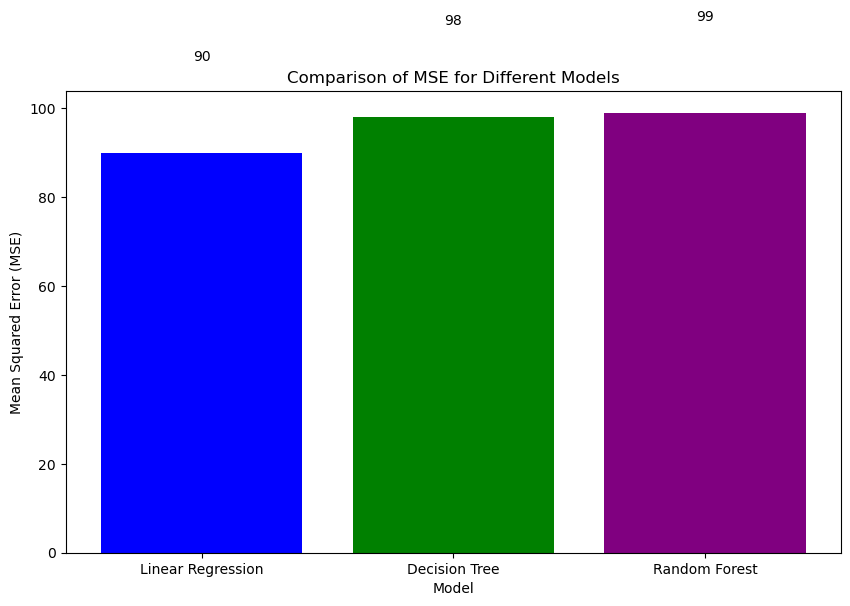

In [38]:
import matplotlib.pyplot as plt

# Assume these are the MSE results for each model
mse_results = {
    'Linear Regression': 90,
    'Decision Tree': 98,
    'Random Forest': 99
}

# Create lists from the dictionary for plotting
models = list(mse_results.keys())
mse_values = list(mse_results.values())

# Create a bar graph
plt.figure(figsize=(10, 6))
plt.bar(models, mse_values, color=['blue', 'green', 'purple'])

# Adding title and labels
plt.title('Comparison of MSE for Different Models')
plt.xlabel('Model')
plt.ylabel('Mean Squared Error (MSE)')

# Display the MSE values on top of the bars
for i in range(len(models)):
    plt.text(i, mse_values[i] + 20, str(mse_values[i]), ha='center', va='bottom')

# Show the plot
plt.show()
